 ## This is a scala example notebook
- Supported magics can be found via %%help
- %%markdown: markdown or Select "Markdown" from Cell type dropdown
- %%sql: sql on spark
- %%bash or %%sh: shell
- %%local: Execution in kernel
- %%configure: Can be used to configure Spark settings

### Run spark command
- SparkContext is available as sc
- Spark application is started lazily on the first Spark command run

In [1]:
sc.version

<IPython.core.display.HTML object>

SparkSession available as 'spark'.


res2: String = 2.3.2


### Scala SparkPi Example

In [2]:
import scala.math.random
import org.apache.spark._
val slices = 6 
val n = 100000 * slices
val count = sc.parallelize(1 to n, slices).map { i =>
  val x = random * 2 - 1
  val y = random * 2 - 1
  if (x*x + y*y < 1) 1 else 0
}.reduce(_ + _)
println("Pi is roughly " + 4.0 * count / n)

import scala.math.random
import org.apache.spark._
slices: Int = 6
n: Int = 600000
count: Int = 471113
Pi is roughly 3.1407533333333335


### Top 10 words in dataset in s3

In [3]:
val file = scala.io.Source.fromURL("https://raw.githubusercontent.com/qubole/jupyter/master/examples/data/pg20417.txt")
val counts = sc.parallelize(file.mkString.split(" ")).
map(word => (word, 1)).reduceByKey(_+_).
map(item => item.swap).  // interchanges position of entries in each tuple
sortByKey(false).
map(item => item.swap).  // interchanges position of entries in each tuple
take(10)

counts.foreach(println)


file: String =
This is a sample text file
This file is to be used for Python Open Labs 11
I hope you practised and learned well in the previous sessions
But as is human nature, out of sight is out of mind
I hope you have been practising your python
Lets put your programming to test today
There are no full stops in this file, because this class is about learning and learning never stops just like my cheesy lame lines
Thanks for your patience
This is an update on gist for testing embedding.
counts: Array[(String, Int)] = Array((is,6), (for,3), (your,3), (hope,2), (learning,2), (this,2), (out,2), (in,2), (stops,2), (you,2))
(is,6)
(for,3)
(your,3)
(hope,2)
(learning,2)
(this,2)
(out,2)
(in,2)
(stops,2)
(you,2)


### sql example

In [4]:
%%sql
show tables

Output()

In [5]:
// Alternate way to use spark sql
spark.sql("show tables").collect

res8: Array[org.apache.spark.sql.Row] = Array([default,default_qubole_airline_origin_destination,false], [default,default_qubole_memetracker,false])


In [6]:
%%sql
select * from default_qubole_memetracker limit 10

Output()

### Visualizations on airline data for four quarters

In [7]:
%%sql
select origin, quarter, count(*)/1000000 count from default_qubole_airline_origin_destination
  where quarter is not NULL group by origin, quarter order by count desc limit 100


Output()

### Matplotlib example using store and local magic
- Using "-o" with sql stores the data in the specified variable in the kernel

In [8]:
%%sql -o data -q
select * from default_qubole_airline_origin_destination limit 10

### Matplotlib can be used alongwith %%local to plot stored data

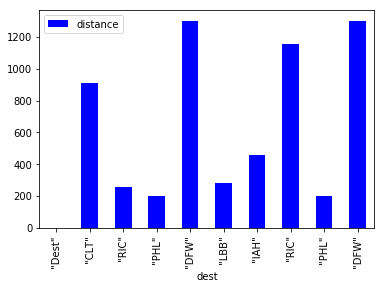

In [9]:
%%local
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

data['distance'] = pd.to_numeric(data['distance'], errors='coerce')
data.plot(kind='bar', x='dest', y='distance', color='blue')

plt.show()